In [1]:
path = 'E:/visao_am/' 

In [2]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.callbacks import TensorBoard
import datetime
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [3]:
num_classes = 2

In [4]:
tf.random.set_seed(12)

In [5]:
modelo_base = ResNet50(weights='imagenet', include_top=False, input_shape= (224,224,3))

In [8]:
for layer in modelo_base.layers:
    layer.trainable = False

In [9]:
modelo = tf.keras.Sequential(
    [modelo_base,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(num_classes, activation = 'softmax')
    ])
    

In [10]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss = 'categorical_crossentropy',
                metrics = [ 'accuracy'])

In [11]:
log_dir = 'E:/visao_am/logs/fit' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq = 1)

In [12]:
callbacks = [tensorboard_callback]

In [13]:
path = 'E:/visao_am/dc_small/'

In [14]:
def criar_dataframe(caminho):
    arquivos = []
    rotulos = []

    for arquivo in os.listdir(caminho):
        if arquivo.startswith('cat'):
            rotulos.append('cat')
        elif arquivo.startswith('dog'):
            rotulos.append('dog')
        arquivos.append(arquivo)
    return pd.DataFrame({'arquivo' : arquivos, 'rotulo': rotulos})


In [15]:
df_dados = criar_dataframe(os.path.join(path, 'train'))

In [16]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   arquivo  2000 non-null   object
 1   rotulo   2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [17]:
df_dados.tail(10)

,arquivo,rotulo
1990,dog.990.jpg,dog
1991,dog.991.jpg,dog
1992,dog.992.jpg,dog
1993,dog.993.jpg,dog
1994,dog.994.jpg,dog
1995,dog.995.jpg,dog
1996,dog.996.jpg,dog
1997,dog.997.jpg,dog
1998,dog.998.jpg,dog
1999,dog.999.jpg,dog


In [18]:
train_df, validation_df = train_test_split(df_dados, test_size=0.2, stratify=df_dados['rotulo'], random_state = 12)

In [19]:
test_df = criar_dataframe(os.path.join(path, 'test1'))

In [20]:
train_df.head()

,arquivo,rotulo
1912,dog.92.jpg,dog
1821,dog.838.jpg,dog
191,cat.270.jpg,cat
1692,dog.721.jpg,dog
81,cat.171.jpg,cat


In [21]:
validation_df.head()

,arquivo,rotulo
585,cat.625.jpg,cat
1723,dog.75.jpg,dog
941,cat.946.jpg,cat
1904,dog.912.jpg,dog
203,cat.281.jpg,cat


In [22]:
test_df.head()

,arquivo,rotulo
0,cat.1500.jpg,cat
1,cat.1501.jpg,cat
2,cat.1502.jpg,cat
3,cat.1503.jpg,cat
4,cat.1504.jpg,cat


In [23]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
validation_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [24]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=os.path.join(path, 'train'),
    x_col  = 'arquivo',
    y_col = 'rotulo',
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical'
)

Found 1600 validated image filenames belonging to 2 classes.


In [25]:
validation_generator = validation_datagen.flow_from_dataframe(
    validation_df,
    directory=os.path.join(path, 'train'),
    x_col  = 'arquivo',
    y_col = 'rotulo',
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical'
)

Found 400 validated image filenames belonging to 2 classes.


In [26]:
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=os.path.join(path, 'test1'),
    x_col  = 'arquivo',
    y_col = 'rotulo',
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical'
)

Found 1000 validated image filenames belonging to 2 classes.


In [27]:
modelo.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10,
    callbacks=callbacks
)

Epoch 1/10


25/25 [==============================] - 66s 3s/step - loss: 0.5249 - accuracy: 0.8931 - val_loss: 0.0620 - val_accuracy: 0.9792
Epoch 2/10
25/25 [==============================] - 60s 2s/step - loss: 0.0380 - accuracy: 0.9856 - val_loss: 0.0304 - val_accuracy: 0.9844
Epoch 3/10
25/25 [==============================] - 60s 2s/step - loss: 0.0205 - accuracy: 0.9906 - val_loss: 0.0175 - val_accuracy: 0.9922
Epoch 4/10
25/25 [==============================] - 61s 2s/step - loss: 0.0072 - accuracy: 0.9994 - val_loss: 0.0174 - val_accuracy: 0.9922
Epoch 5/10
25/25 [==============================] - 62s 2s/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0146 - val_accuracy: 0.9948
Epoch 6/10
25/25 [==============================] - 61s 2s/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0163 - val_accuracy: 0.9948
Epoch 7/10
25/25 [==============================] - 62s 3s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0160 - val_accuracy: 0.9948
Epoch 8/10
25/25 [

In [28]:
test_loss,test_accuracy = modelo.evaluate(test_generator, steps = test_generator.samples // test_generator.batch_size)
print(f'Acurácia no teste: (test_accuracy)')

15/15 [==============================] - 28s 2s/step - loss: 0.0460 - accuracy: 0.9854
Acurácia no teste: (test_accuracy)


In [29]:
%load_ext tensorboard

In [31]:
tensorboard --logdir 'E:/visao_am/logs'

Reusing TensorBoard on port 6006 (pid 3812), started 0:00:52 ago. (Use '!kill 3812' to kill it.)

In [128]:
modelo.save(path + 'tl_resnet50_5_epoch.keras')

In [129]:
def predicao_img(imagem, modelo):
    img = image.load_img(imagem, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    predicoes = modelo.predict(img_array)
    classes = {0: 'cat', 1: 'dog'}
    classe_predita = classes[np.argmax(predicoes[0])]
    
    return classe_predita, img

In [130]:
dir_origem = 'E:/visao_am/dc_small/amostras/'

In [131]:
amostras = [ os.path.join(dir_origem, f) \
           for f in os.listdir(dir_origem) \
           if f.endswith(( '.png', '.jpg', '.jfif', '.jpeg'))]

1/1 [==============================] - 1s 812ms/step


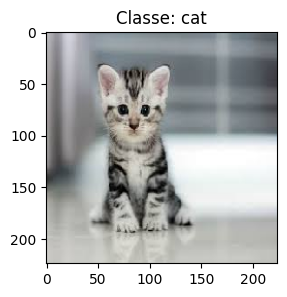

1/1 [==============================] - 0s 66ms/step


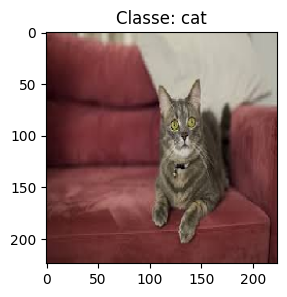

1/1 [==============================] - 0s 77ms/step


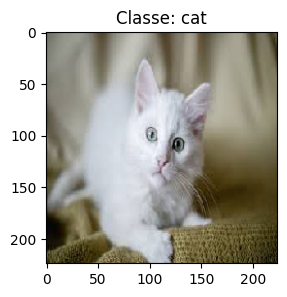

1/1 [==============================] - 0s 69ms/step


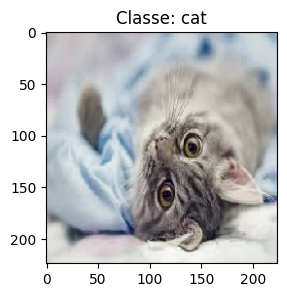

1/1 [==============================] - 0s 76ms/step


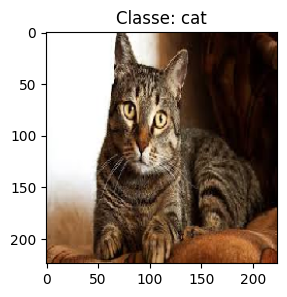

1/1 [==============================] - 0s 72ms/step


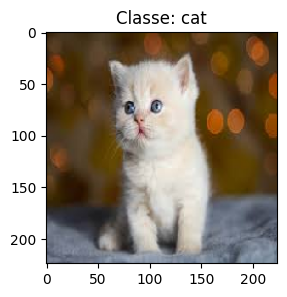

1/1 [==============================] - 0s 76ms/step


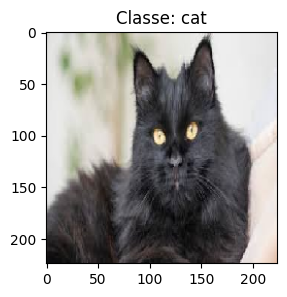

1/1 [==============================] - 0s 74ms/step


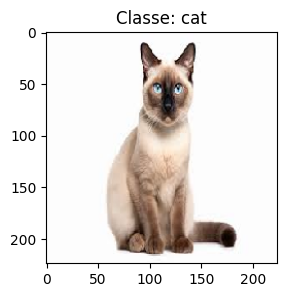

1/1 [==============================] - 0s 63ms/step


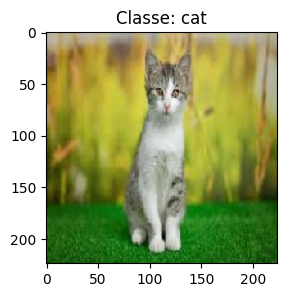

1/1 [==============================] - 0s 69ms/step


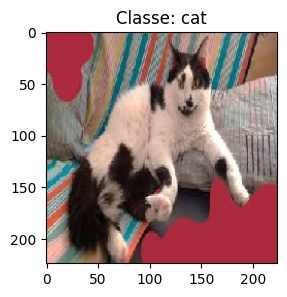

1/1 [==============================] - 0s 78ms/step


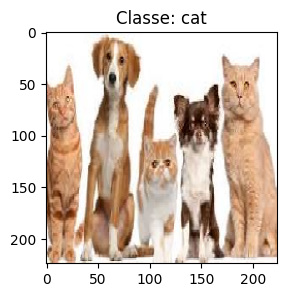

1/1 [==============================] - 0s 71ms/step


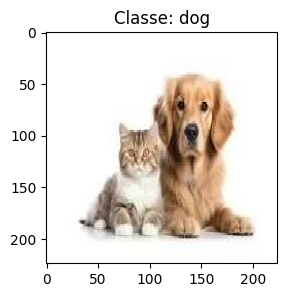

1/1 [==============================] - 0s 72ms/step


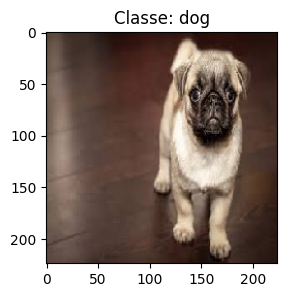

1/1 [==============================] - 0s 74ms/step


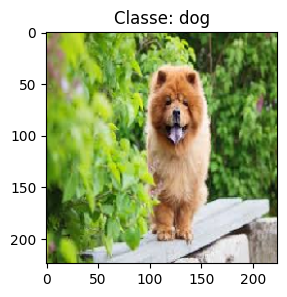

1/1 [==============================] - 0s 79ms/step


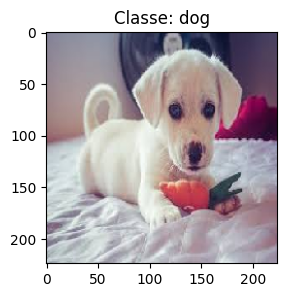

1/1 [==============================] - 0s 84ms/step


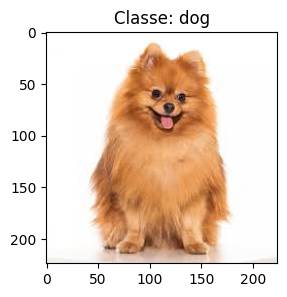

1/1 [==============================] - 0s 77ms/step


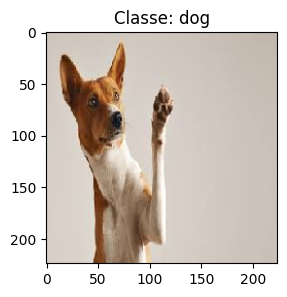

1/1 [==============================] - 0s 89ms/step


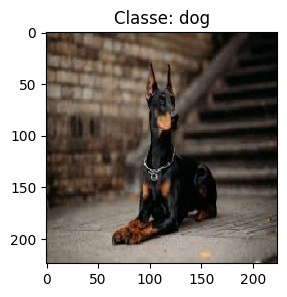

1/1 [==============================] - 0s 82ms/step


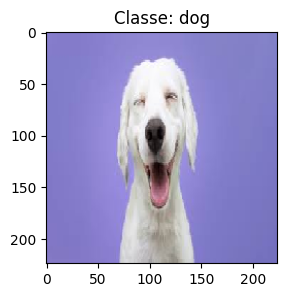

1/1 [==============================] - 0s 83ms/step


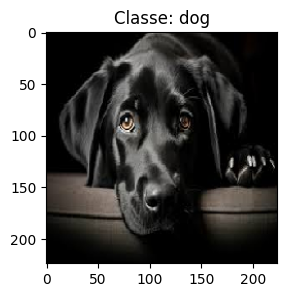

1/1 [==============================] - 0s 77ms/step


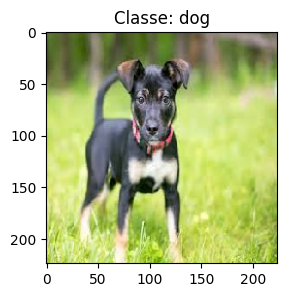

1/1 [==============================] - 0s 83ms/step


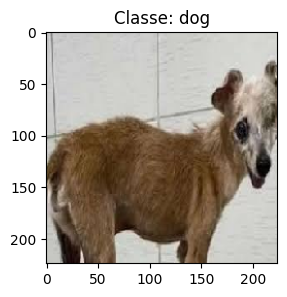

1/1 [==============================] - 0s 76ms/step


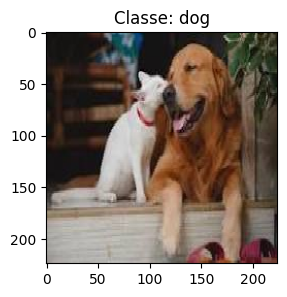

In [132]:
for amostra in amostras:
    classe_predita, img = predicao_img(amostra, modelo)
    plt.figure(figsize=(3,3))
    plt.imshow(img)
    plt.title(f'Classe: {classe_predita}')
    plt.show()

In [ ]:
Verificação